# Random Forest Applied to the Dataset Generated by the Helper Module

## Importing Modules

In [1]:
# For data exploration
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import my_preprocessing_functions as mpf
# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
# For displaying results
import seaborn as sn
import os
from pprint import pp

In [2]:
# Boolean to update the output or just load them from disk
# Change to True if you want to update the values stored on disk
update_results = False

In [3]:
# loading feature engineered data in a dataframe
# we rename the column names to not have issues when joining the dataframes

full_data_df = pd.DataFrame()
ramp_df = pd.read_csv("./Data/ram_features.csv", header=None)

injectionp_df = pd.read_csv("./Data/injection_pressure_features.csv", header=None)
injectionp_df.columns = np.arange(22, 44, dtype=int)

sensorp_df = pd.read_csv("./Data/sensor_pressure_features.csv", header=None)
sensorp_df.columns = np.arange(44, 66, dtype=int)

labels_df = pd.read_csv("./Data/Y2.csv", header=None)

full_data_df = ramp_df.join(injectionp_df.join(sensorp_df))
full_data_df[66] = labels_df
full_data_df

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029574,...,1.348450e+07,12153000.0,36289200.0,1.810414e+07,1.183458,-0.425242,0.656510,19348500.0,0.759095,1
1,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029305,...,1.183386e+07,12232000.0,32058500.0,1.635327e+07,1.100449,-0.568736,0.174720,17200000.0,0.755031,1
2,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029168,...,1.173513e+07,12930000.0,32070000.0,1.640097e+07,1.093430,-0.552906,0.734860,17237500.0,0.760460,1
3,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029315,...,1.247266e+07,11968000.0,33437000.0,1.695804e+07,1.113614,-0.569749,0.177975,17847000.0,0.762628,1
4,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029339,...,1.298727e+07,12652000.0,35078200.0,1.765239e+07,1.147779,-0.482242,0.670877,18733500.0,0.729493,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029395,...,1.363665e+07,12173500.0,36528800.0,1.824144e+07,1.187762,-0.418296,0.631007,19474000.0,0.739304,0
1538,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029345,...,1.275532e+07,12971000.0,34525900.0,1.751692e+07,1.111707,-0.552671,0.717994,18453500.0,0.746771,0
1539,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029421,...,1.238100e+07,12194000.0,33610200.0,1.677909e+07,1.172536,-0.417364,0.752829,17885500.0,0.872204,1
1540,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029284,...,1.401098e+07,12802000.0,37404600.0,1.870156e+07,1.167634,-0.463928,0.675784,19870000.0,0.727174,0


## Creating the Pipeline
- Before we change our current dataset by introducing some transformations on our pipeline we inspect our initial dataset:

In [4]:
# The full_dataset splitted in features and labels is:
# pandas slicing includes the last index!
features = full_data_df.loc[:, 0:65]
labels = full_data_df.loc[:, 66]

- Features

In [5]:
features

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029574,...,38697000.0,1.348450e+07,12153000.0,36289200.0,1.810414e+07,1.183458,-0.425242,0.656510,19348500.0,0.759095
1,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029305,...,34400000.0,1.183386e+07,12232000.0,32058500.0,1.635327e+07,1.100449,-0.568736,0.174720,17200000.0,0.755031
2,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029168,...,34475000.0,1.173513e+07,12930000.0,32070000.0,1.640097e+07,1.093430,-0.552906,0.734860,17237500.0,0.760460
3,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029315,...,35694000.0,1.247266e+07,11968000.0,33437000.0,1.695804e+07,1.113614,-0.569749,0.177975,17847000.0,0.762628
4,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029339,...,37467000.0,1.298727e+07,12652000.0,35078200.0,1.765239e+07,1.147779,-0.482242,0.670877,18733500.0,0.729493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029395,...,38948000.0,1.363665e+07,12173500.0,36528800.0,1.824144e+07,1.187762,-0.418296,0.631007,19474000.0,0.739304
1538,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029345,...,36907000.0,1.275532e+07,12971000.0,34525900.0,1.751692e+07,1.111707,-0.552671,0.717994,18453500.0,0.746771
1539,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029421,...,35771000.0,1.238100e+07,12194000.0,33610200.0,1.677909e+07,1.172536,-0.417364,0.752829,17885500.0,0.872204
1540,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029284,...,39740000.0,1.401098e+07,12802000.0,37404600.0,1.870156e+07,1.167634,-0.463928,0.675784,19870000.0,0.727174


- Labels

In [6]:
labels

0       1
1       1
2       1
3       1
4       1
       ..
1537    0
1538    0
1539    1
1540    0
1541    1
Name: 66, Length: 1542, dtype: int64

- We check the imbalance proportions before we apply the pipeline transformations:

In [7]:
mpf.check_imbalance(labels)

The imbalance profile has:
 70.04% of valid products and     
 29.96% of invalid products


### Pipeline Construction

In [8]:
# features normalized and filtered
proto_features = features.pipe(mpf.normalize).pipe(mpf.drop_rows_with_only_nan_values)

In [9]:
proto_features

,0,9,10,11,12,13,14,15,16,17,...,56,57,58,59,60,61,62,63,64,65
0,-0.999676,1.501974,1.939444,-0.343346,-0.999676,0.564167,1.715246,1.649904,1.958295,-1.773758,...,1.087917,1.045017,-0.726272,1.080923,0.919813,1.672058,1.169527,-0.376692,1.087917,0.239571
1,-0.999676,-0.518824,-0.486110,0.360816,-0.999676,-0.387596,-0.449908,-0.656303,-0.797283,0.815002,...,-0.931479,-0.800240,-0.584643,-0.892881,-0.827658,-0.972617,-0.902328,-0.580061,-0.931479,0.126121
2,-0.999676,-1.548079,-2.029322,-0.295393,-0.999676,-0.073770,-1.500208,-1.993306,-1.710538,1.163351,...,-0.896233,-0.910617,0.666707,-0.887516,-0.780052,-1.196270,-0.673753,-0.343620,-0.896233,0.277676
3,-0.999676,-0.443703,-0.014819,-0.403499,-0.999676,0.731069,-0.191695,0.538220,-0.031719,-0.341763,...,-0.323358,-0.086129,-1.057934,-0.249751,-0.224066,-0.553176,-0.916950,-0.578687,-0.323358,0.338197
4,-0.999676,-0.269275,0.172989,-0.852749,-0.999676,0.531535,0.056051,-0.141051,0.033288,-0.487708,...,0.509872,0.489163,0.168318,0.515940,0.468939,0.535320,0.346533,-0.370627,0.509872,-0.586794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,-0.999676,0.156899,1.990826,-2.224057,-0.999676,2.518716,2.039757,1.707890,1.710315,-2.723858,...,1.205875,1.215108,-0.689520,1.192707,1.056853,1.809176,1.269817,-0.387457,1.205875,-0.312912
1538,-0.999676,-0.223540,-0.560524,0.676301,-0.999676,-0.785332,-1.440889,-1.103627,-0.722483,0.967658,...,0.246698,0.229867,0.740210,0.258268,0.333731,-0.613960,-0.670365,-0.350739,0.246698,-0.104464
1539,-0.999676,0.349722,0.725781,-0.610877,-0.999676,0.898390,1.291287,1.129682,0.922857,-1.164887,...,-0.287171,-0.188590,-0.652769,-0.168946,-0.402664,1.324074,1.283280,-0.336035,-0.287171,3.397103
1540,-0.999676,-0.682951,0.867523,-2.214382,-0.999676,2.280118,0.886520,1.020336,0.664132,-1.926989,...,1.578080,1.633571,0.437233,1.601306,1.516076,1.167898,0.610959,-0.368556,1.578080,-0.651531


In [10]:
# balancing dataset - using data augmentation
features, labels = mpf.balance(proto_features, labels)
mpf.check_imbalance(labels)

The imbalance profile has:
 50.00% of valid products and     
 50.00% of invalid products


### Decision Trees & Ensembles (Random Forest)
- We will start by using _decision trees_ with bagging (Bootstrap Aggregating). The idea is that using the same model, we will randomly arrange the initial tree configuration and then proceed to calculate the outcome.
- By same model we mean how we split and select the features and how we predict the outcome (simple voting, weighted voting).
- We will use the class RandomForestClassifier which incorporates the methods and attributes when working with a decission tree with bagging.
- **NOTE**: Due to the random initial configuration for the decision trees, this algorithm naturally incorporates cross-validation which can also help with overfitting.
- When doing parameter optimization using GridSearch, `cv=None` means 5-fold cross-validation splitting. See the documentation of

- Splitting the data
    - We use the the function from `sklearn.model_selection`: **train_test_split()**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2
)

- We check the imbalance proportions of training dataset and test dataset.

In [12]:
print("The imbalance proportions for the training dataset is:")
mpf.check_imbalance(y_train)

The imbalance proportions for the training dataset is:
The imbalance profile has:
 50.00% of valid products and     
 50.00% of invalid products


In [13]:
print("The imbalance proportions for the test dataset is:")
mpf.check_imbalance(y_test)

The imbalance proportions for the test dataset is:
The imbalance profile has:
 50.00% of valid products and     
 50.00% of invalid products


In [14]:
n = len(features)
n_train = len(X_train)
n_test = len(X_test)

- The splitting looks as follows:

In [15]:
print(f"The total number of datapoints is: {n}")
print(f"The size of training set is {n_train} which correspond to the {n_train * 100 / n:.2f}%")
print(f"The size of test set is {n_test} which correspond to the {n_test * 100 / n:.2f}%")

The total number of datapoints is: 2160
The size of training set is 1728 which correspond to the 80.00%
The size of test set is 432 which correspond to the 20.00%


#### Tranining Phase

- We create an instance of the Random Forest Classifier (RFC)

In [16]:
pilot_model_rfc = RandomForestClassifier()

- We now train a pilot model:

In [17]:
pilot_model_rfc.fit(X_train, y_train)

RandomForestClassifier()

- **Remark**: it is important to note that in a time series problem the mean accuracy cannot be considered as a good indicator for the performance. The reason for this is that the datapoins are time correlated and are therefore not independent from each other. However, after feature engineering which allows to represent the time series problem as a classification problem with tabular data, then we at this point can consider the mean accuracy as good indicator for the performance of the algorithm **ONLY** when we have a balanced dataset!. We address this imbalance issue by incrementing the minority class and using the **f1 score** to estimate better the true positives, true negatives, false positives and false negatives.

In [18]:
print(f"The mean accuracy of the model with defaults is: \
{pilot_model_rfc.score(X_test, y_test) * 100:.2f}%")

The mean accuracy of the model with defaults is: 78.24%


- The defaults of this method are:

In [19]:
pilot_model_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Parameter tunning
- Now we will explore the effect of some parameters:

In [20]:
def rfc_train_evaluator(model_rfc) -> tuple:
    model_rfc.fit(X_train, y_train)
    mean_accuracy = model_rfc.score(X_test, y_test) * 100
    y_predicted = model_rfc.predict(X_test)
    return (mean_accuracy, y_predicted)

- The default number of trees is 100 which can be considered a reasonable good attempt. However, we are now explore lower an higher values to see if we could improve the performance of our model:

In [21]:
accuracy_rfc = []
predictions_rfc = []
n_trees_list = [x for x in range(5, 400, 5)]
# The paths where the files will be saved
accuracy_rfc_path = "./Data/accuracy_rfc.txt"
predictions_rfc_path = "./Data/predictions_rfc.txt"
if update_results:
    print("Generating the accuracy and predictions ...")
    for n_trees in n_trees_list:
        model_rfc = RandomForestClassifier(n_estimators=n_trees)
        accuracy, prediction = rfc_train_evaluator(model_rfc)
        accuracy_rfc.append(round(accuracy, 2))
        predictions_rfc.append(prediction)
    accuracy_rfc = np.array(accuracy_rfc)
    predictions_rfc = np.array(predictions_rfc)
    np.savetxt("./Data/accuracy_rfc.txt", accuracy_rfc)
    np.savetxt("./Data/predictions_rfc.txt", predictions_rfc)
else:
    if not os.path.exists(accuracy_rfc_path) and not os.path.exists(predictions_rfc_path):
        print("Generating the accuracy and predictions ...")
        for n_trees in n_trees_list:
            model_rfc = RandomForestClassifier(n_estimators=n_trees)
            accuracy, prediction = rfc_train_evaluator(model_rfc)
            accuracy_rfc.append(round(accuracy, 2))
            predictions_rfc.append(prediction)
        accuracy_rfc = np.array(accuracy_rfc)
        predictions_rfc = np.array(predictions_rfc)
        np.savetxt("./Data/accuracy_rfc.txt", accuracy_rfc)
        np.savetxt("./Data/predictions_rfc.txt", predictions_rfc)
    else:
        print("Loading accuracy and predictions from disk ...")
        accuracy_rfc = np.loadtxt("./Data/accuracy_rfc.txt")
        predictions_rfc = np.loadtxt("./Data/predictions_rfc.txt").astype(dtype=int)

Loading accuracy and predictions from disk ...


- We know plot to see the effect of the number of trees on the performance of the model:

In [22]:
# we will plot also the running average
window_rfc = 5
rolling_mean_average = []
for index in range(len(accuracy_rfc) - window_rfc + 1):
    rolling_mean_average.append(np.mean(accuracy_rfc[index:index+window_rfc]))
for index in range(window_rfc - 1):
    rolling_mean_average.insert(0, np.nan)

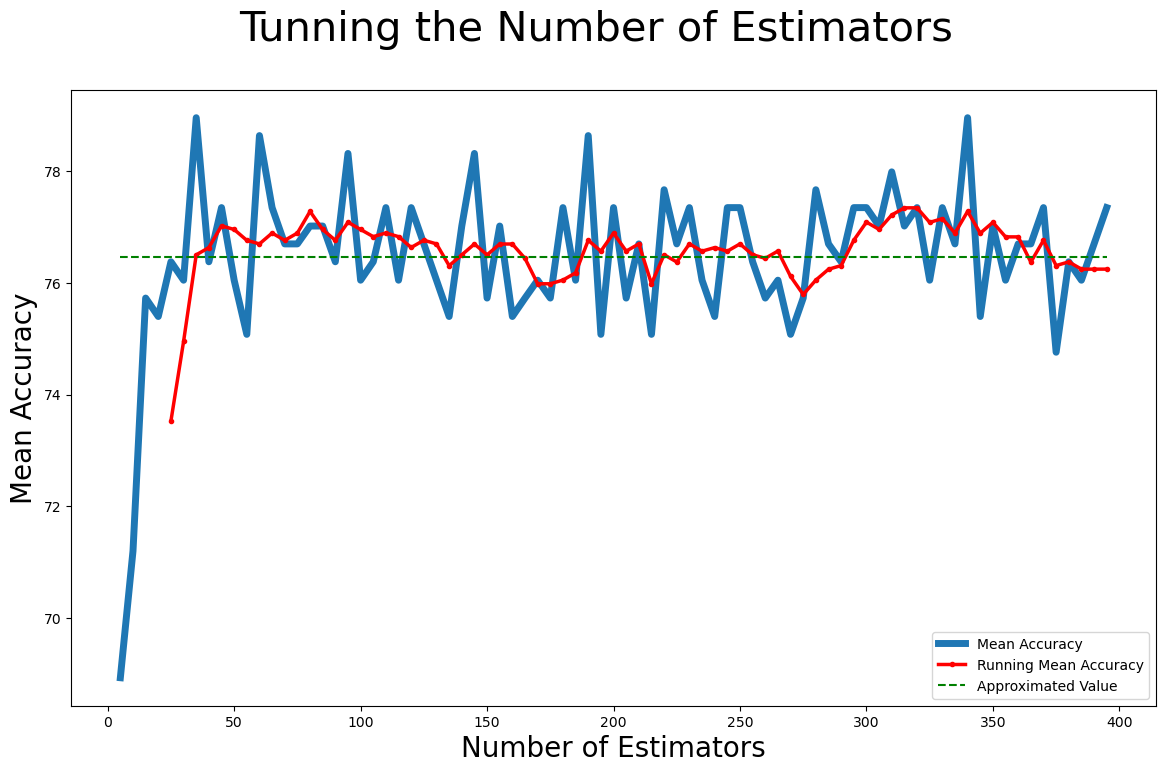

In [23]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("Tunning the Number of Estimators", fontsize=fs * 1.5)
plt.xlabel("Number of Estimators", fontsize=fs)
plt.ylabel("Mean Accuracy", fontsize=fs)
plt.plot(n_trees_list, accuracy_rfc, linewidth=lw, label="Mean Accuracy")
plt.plot(n_trees_list, rolling_mean_average, "r.-", linewidth=0.5*lw, label="Running Mean Accuracy")
plt.hlines(np.mean(accuracy_rfc), min(n_trees_list), max(n_trees_list), color='green', linestyle='dashed', label='Approximated Value')
plt.legend()
plt.show()

- From the plot above we can see that the mean accuracy increases with the number of trees (number of estimators). Starting with a number of trees equal to 10 already provides an accuracy close to 70% and this rapidily increases as we increase the number of trees. However, we see that we reach a plateau with middle accuracy of around 74%. Therefore for further explorations on the hyperparameter optimization _we will choose the number of estimators equal to $200$_. Also We can see why the default value is chosen to $100$.

- **IMPORTANT:**
    - The Mean Average have no meaning when the labeling of the data is imbalanced.
    - This is no longer our case, as we have addressed the imbalance issue with `SMOTE` and its minority strategy.

- Seems to be reasonable to choose as number of estimators, `n_estimators=200` as the Random Forest algorithm seems to reach a plateau value (Even the default $100$ seems reasonable enough)

In [26]:
tunned_rfc = RandomForestClassifier(n_estimators=200)
pilot_model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
tunned_accuracy, tunned_predictions = rfc_train_evaluator(tunned_rfc)
cm = confusion_matrix(y_test, tunned_predictions)

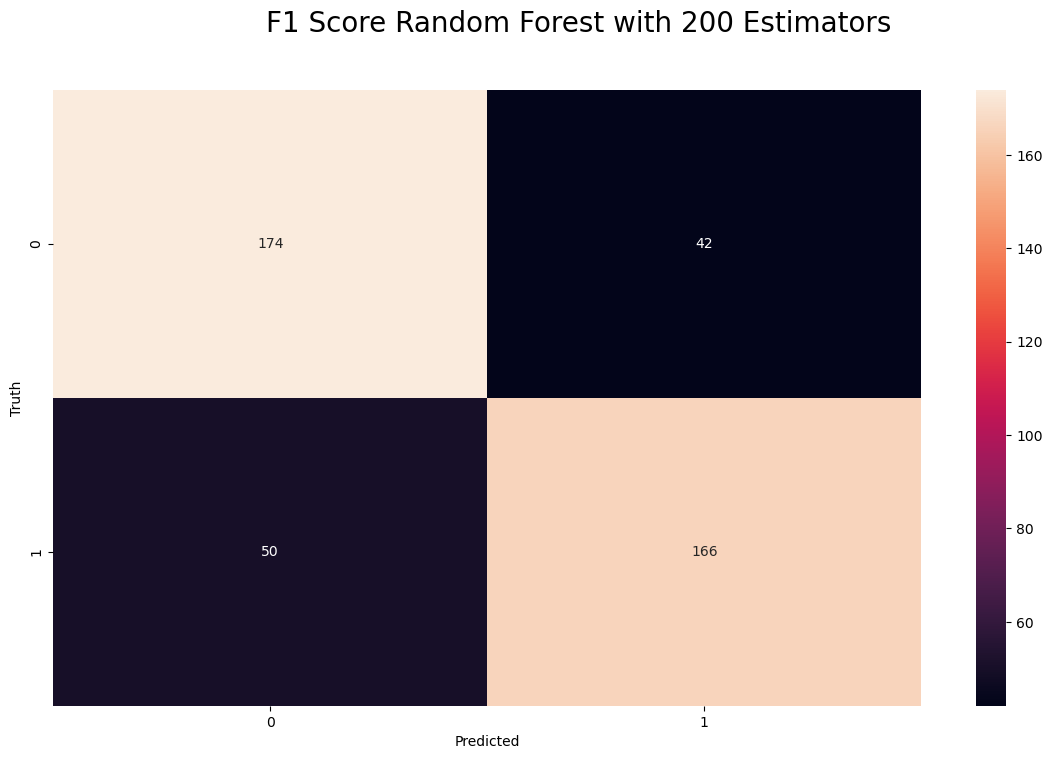

In [28]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("F1 Score Random Forest with 200 Estimators", fontsize=fs)
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, tunned_predictions).ravel()
print(f"From the test dataset with {len(y_test)} datapoints, we conclude:\n")
print(f"True Positives: {tp} were correctly identified as valid products\n\
True Negatives: {tn} were correctly identified as not valid products\n\
False Positives: {fp} were incorrectly identified as valid products\n\
False Negative: {fp} were incorrectly identified as not valid products")

From the test dataset with 432 datapoints, we conclude:

True Positives: 166 were correctly identified as valid products
True Negatives: 174 were correctly identified as not valid products
False Positives: 42 were incorrectly identified as valid products
False Negative: 42 were incorrectly identified as not valid products


##### Chosing the Error Indicator
- We naturally will chose as the F1 score which is the correct metric when dealing with imbalanced data.
- We recall here the formula of the F1 score:
$$F_1 score  = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
- The F1 score is based on the harmonic average between precision and recall. Both precision and recall are rates.
- Here the Precision is calculated for each particular class. In our case total number of correctly classified products divided by the total number of correctly classified products and incorrectly classified not valid products. Analogously for the not valid product class.
- The recall for the correctly classified products is given by the number of correctly classified products divided by the sum of correctly classified products and incorrectly classified valid products. Analogously for the non valid product class.
- Manually calculating the $F_1$ score for each class: "valid" and "not valid".

In [30]:
precision_valid_class = tp / (tp + fp)
recall_valid_class = tp / (tp + fn)
f1_valid_class = 2 * precision_valid_class * recall_valid_class / (precision_valid_class + recall_valid_class)
print(f"The precision of the valid class is {precision_valid_class:.2f}\n\
The recall of the valid class is {recall_valid_class:.2f}\n\
The F1 score of the valid class is: {f1_valid_class:.2f}")

The precision of the valid class is 0.80
The recall of the valid class is 0.77
The F1 score of the valid class is: 0.78


In [31]:
precision_not_valid_class = tn / (tn + fn)
recall_not_valid_class = tn / (tn + fp)
f1_not_valid_class = 2 * precision_not_valid_class * recall_not_valid_class / (precision_not_valid_class + recall_not_valid_class)
print(f"The precision of the not valid class is {precision_not_valid_class:.2f}\n\
The recall of the not valid class is {recall_not_valid_class:.2f}\n\
The F1 score of the not valid class is: {f1_not_valid_class:.2f}")

The precision of the not valid class is 0.78
The recall of the not valid class is 0.81
The F1 score of the not valid class is: 0.79


- A faster way to calculate the relevant values is by passing the option **average=None** to the above functions

In [32]:
precisions = precision_score(y_test, tunned_predictions, average=None)
recalls = recall_score(y_test, tunned_predictions, average=None)
f1_scores = f1_score(y_test, tunned_predictions, average=None)
p_not_valid_class, p_valid_class = precisions[0], precisions[1]
r_not_valid_class, r_valid_class = recalls[0], recalls[1]
f1_not_valid_class, f1_valid_class = f1_scores[0], f1_scores[1]

In [33]:
print(f"The precission for the not valid and valid classes are respectively {precisions[0]:.2f} and {precisions[1]:.2f}")
print(f"The recall for the not valid and valid classes are respectively {recalls[0]:.2f} and {recalls[1]:.2f}")
print(f"The f1 scores for the not valid and valid classes are respectively {f1_scores[0]:.2f} and {f1_scores[1]:.2f}")

The precission for the not valid and valid classes are respectively 0.78 and 0.80
The recall for the not valid and valid classes are respectively 0.81 and 0.77
The f1 scores for the not valid and valid classes are respectively 0.79 and 0.78


- For now on our error metric will be the _F1 score for the not valid class as our to-go indicator of the model performance!!_

#### Random Search Training
- We create a hyperparameter grid:

- First some review of Split Criteria
1. Gini:
    $$H(Q_m) = 1 - \sum_{c=k}p_{mk}(1 - p_{mk})$$
    - where:
        - $Q_m$ is a subset obtained at the moment os splitting.
        - $k$ is the number of different classes at the node of the split.
2. Log Loss or Entropy
    $$H(Q_m) = -\sum_{c=k}p_{mk}\log(p_{mk})$$

In [35]:
# number of trees in the forest
n_estimators = [x for x in range(10, 400, 10)]

# Check https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation
# gini index: works better for small datasets - based on rational ratios
# entropy: works better for bigger datasets - approach to continue uses log entropy
criterion = ["gini", "entropy", "log_loss"]

# max_features = [sqrt(n_features), log2(n_features)] at every split
# can introduce overfitting if number is too small
max_features = ["sqrt", "log2"]

# When False the whole dataset is used to build each tree, if True the dataset
# is resampled with replacement! -- Expect to perform worst when is True
bootstrap = [True, False]

- We create a random grid:

In [36]:
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'bootstrap': bootstrap}
pp(param_grid, depth=1, width=36)
print(f"The total number of hyperparameter combination is: {len(n_estimators)*len(criterion)*len(max_features)*len(bootstrap)}")

{'n_estimators': [...],
 'criterion': [...],
 'max_features': [...],
 'bootstrap': [...]}
The total number of hyperparameter combination is: 468


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    # n_iter=400,  # the size of random set choosen as new population
    cv=None,  # (None is 5-fold cv)
    verbose=0,  # more messages and feedback (the higher the more messages)
    # random_state=42,  # particular random seed given so this result can be reproduced
    n_jobs=-1)  # to give how many jobs can run in parallel (-1 means use all processors)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300, ...]})

- Viewing the best parameters during the training:

In [38]:
rf_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 110}

In [39]:
bne = rf_grid.best_params_['n_estimators']
bmf = rf_grid.best_params_['max_features']
bc = rf_grid.best_params_['criterion']
bb = rf_grid.best_params_['bootstrap']

- Lets evaluate the best found combination of parameters:

In [40]:
best_rfc = RandomForestClassifier(n_estimators=bne,
                                  max_features=bmf,
                                  criterion=bc,
                                  bootstrap=bb)
best_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=110)

In [41]:
best_accuracy, best_predictions = rfc_train_evaluator(best_rfc)
cm_best = confusion_matrix(y_test, best_predictions)

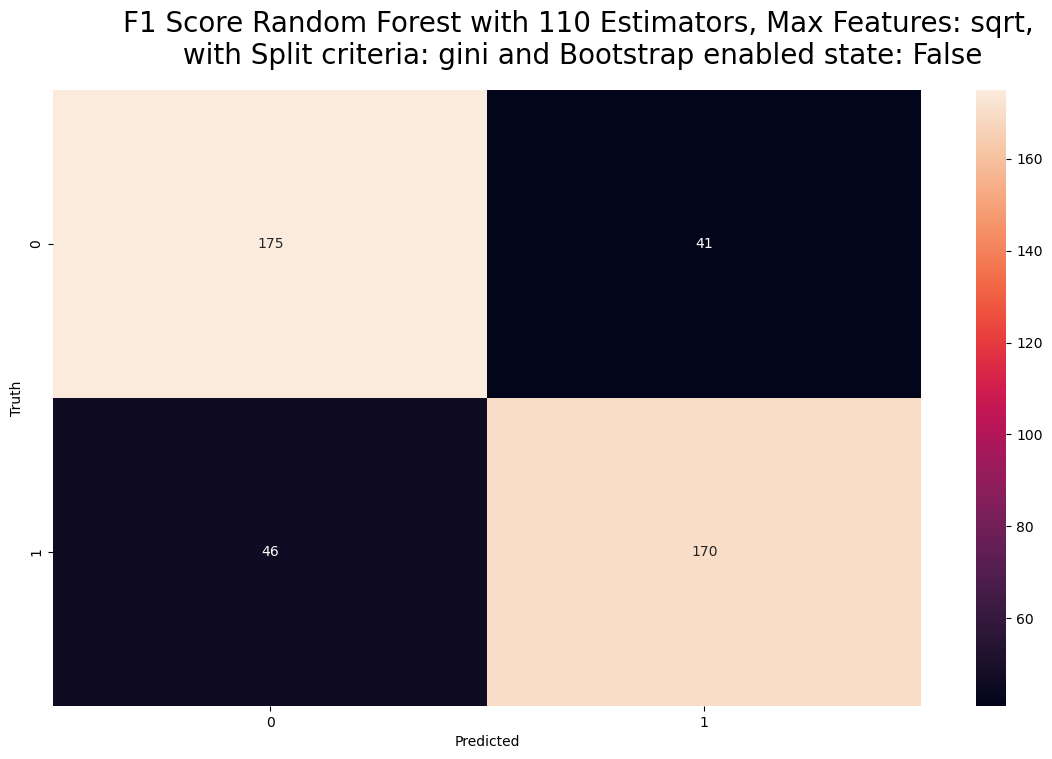

In [42]:
fig_best_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
title = "F1 Score Random Forest with " + str(bne) + " Estimators" +\
    ", Max Features: " + bmf + \
    ",\n with Split criteria: " + bc + \
    " and Bootstrap enabled state: " + str(bb)
fig_best_rfc.suptitle(title, fontsize=fs)
sn.heatmap(cm_best, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [43]:
best_precisions = precision_score(y_test, best_predictions, average=None)
best_recalls = recall_score(y_test, best_predictions, average=None)
best_f1_scores = f1_score(y_test, best_predictions, average=None)

In [44]:
print(f"The best precission for the not valid and valid classes are \
          respectively {best_precisions[0]:.2f} and {best_precisions[1]:.2f}")
print(f"The best recall for the not valid and valid classes are \
    respectively {best_recalls[0]:.2f} and {best_recalls[1]:.2f}")
print(f"The best f1 scores for the not valid and valid classes are \
    respectively {best_f1_scores[0]:.2f} and {best_f1_scores[1]:.2f}")

The best precission for the not valid and valid classes are           respectively 0.79 and 0.81
The best recall for the not valid and valid classes are     respectively 0.81 and 0.79
The best f1 scores for the not valid and valid classes are     respectively 0.80 and 0.80


## Conclusions:

- SMOTE helps to improve the f1 score of our imbalance dataset for injection moulding.

### How to avoid overfitting using Random Forest

- Random Forest incorporates cross validation when the number of estimators increases, therefore it intrinsically keeps overfitting in place, but still can happen if decision tree splits are done careless.
- GridSearch with cv=None, uses 5-fold cross-validation which also helps to keep overfitting in check.
- Controling the `max_features` parameter which control what is the maximum value of features that one considers when looking for the best fit. The smaller the number can introduce overfitting, so this parameter should not be _too slow_.
- The heigh of the tree is not a parameter we wish to control as we are always looking to binary question: is the product valid or not? So we leave the height free until the model is able to reach a _leaf_ node.

## TODO:
- In the next notebook, we will: first use another library for feature extraction called **tsfresh**, which stands for: **Time series feature extraction based on scalable hypothesis tests**.
    - Check the conference: PyCon.DE 2017 [tsfresh](https://www.youtube.com/watch?v=Fm8zcOMJ-9E&ab_channel=PyConDE)